## Demo实践

#### Step1:库函数导入

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#### Step2:模型训练

In [5]:
x_fearures=np.array([[-1,-2],[-2,-1],[-3,-2],[1,3],[2,1],[3,2]])
y_label=np.array([0,0,0,1,1,1])
lr_clf=LogisticRegression()
lr_clf=lr_clf.fit(x_features,y_label)

#### Step3:模型参数查看

In [6]:
print('the weight of Logistic Regression:',lr_clf.coef_)
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


#### Step4:数据和模型可视化

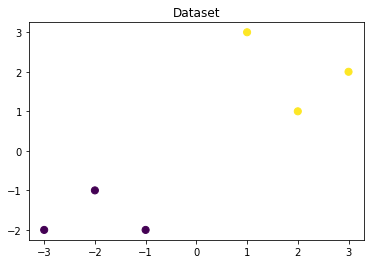

In [8]:
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1],c=y_label,s=50,cmap='viridis')
#s为数据点的大小 cmap为数据的颜色
plt.title('Dataset')
plt.show()

/var/folders/0b/fx5b7rgn6rl61000z85h05fw0000gn/T/ipykernel_20779/1942386155.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth', 'color'
  plt.contour(x_grid,y_grid,z_proba,[0.5],linewidth=2.,color='blue')


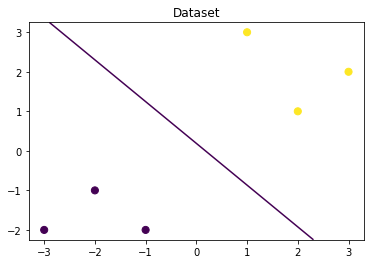

In [9]:
#可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1],c=y_label,s=50,cmap='viridis')
plt.title('Dataset')

nx,ny=200,100 #定义x轴和y轴上的网格数量
#获取当前坐标轴的最大值和最小值
x_min,x_max=plt.xlim() #设置坐标轴范围
y_min,y_max=plt.ylim()
#获取x和y轴上的网格点坐标
#用于生成坐标网络
#np.linspace生成等间隔的数值序列
x_grid,y_grid=np.meshgrid(np.linspace(x_min,x_max,nx),np.linspace(y_min,y_max,ny))

#predict_proba用于预测分类模型中各个类别的概率
#np.c_用于按照列连接数组
#ravel函数用于将多维数组展开为一维数组
#利用逻辑回归分类器，对网格点坐标进行预测，并获得预测的概率
z_proba=lr_clf.predict_proba(np.c_[x_grid.ravel(),y_grid.ravel()])
#提取预测结果中类别为 1 的概率，并将其重新塑造为与网格点坐标相同的形状
z_proba=z_proba[:,1].reshape(x_grid.shape)
#绘制等高线图，其中 x_grid 和 y_grid 表示网格点的坐标
#z_proba 表示对应的预测概率值，[0.5] 表示绘制决策边界
#linewidth=2. 和 color='blue' 表示线条的宽度和颜色
plt.contour(x_grid,y_grid,z_proba,[0.5],linewidth=2.,color='blue')

plt.show()

/var/folders/0b/fx5b7rgn6rl61000z85h05fw0000gn/T/ipykernel_20779/2475509161.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))
/var/folders/0b/fx5b7rgn6rl61000z85h05fw0000gn/T/ipykernel_20779/2475509161.py:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))


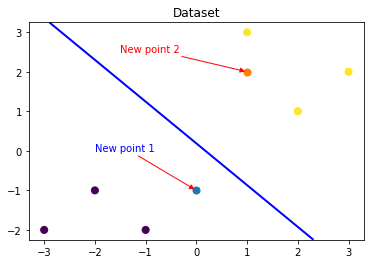

In [10]:
#可视化预测新样本

plt.figure()
#new point 1
x_fearures_new1=np.array([[0,-1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1],s=50,cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))
#plt.annotate可以在图形中添加注释

#new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

#训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1],c=y_label,s=50,cmap='viridis')
plt.title('Dataset')

#plt.contour用于绘制等高线图
plt.contour(x_grid,y_grid,z_proba,[0.5],linewidths=2.,colors='blue')

plt.show()


#### Step5:模型预测

In [11]:
y_label_new1_predict=lr_clf.predict(x_fearures_new1)
y_label_new2_predict=lr_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

#逻辑回归为概率预测模型，可以利用predict_proba函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


## 基于鸢尾花数据集的逻辑回归分类实践

#### Step1:库函数导入

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step2:数据读取/载入

In [19]:
from sklearn.datasets import load_iris
data=load_iris()
iris_target=data.target
iris_features=pd.DataFrame(data=data.data,columns=data.feature_names)
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


sepal length:花萼长度（cm）<br>
sepal width：花萼宽度（cm）<br>
petal length：花瓣长度（cm）<br>
petal width：花瓣宽度（cm）<br>
target：鸢尾花所属的三个类别‘setosa’（0），‘versicolor’（1），‘virginica’（2）

#### Step3:数据信息简单查看

In [51]:
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [52]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [53]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
pd.Series(iris_target).value_counts()
#查看每个类别数量

0    50
1    50
2    50
dtype: int64

In [55]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
iris_all=iris_features.copy()
iris_all['target']=iris_target

In [26]:
iris_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Step4:可视化描述

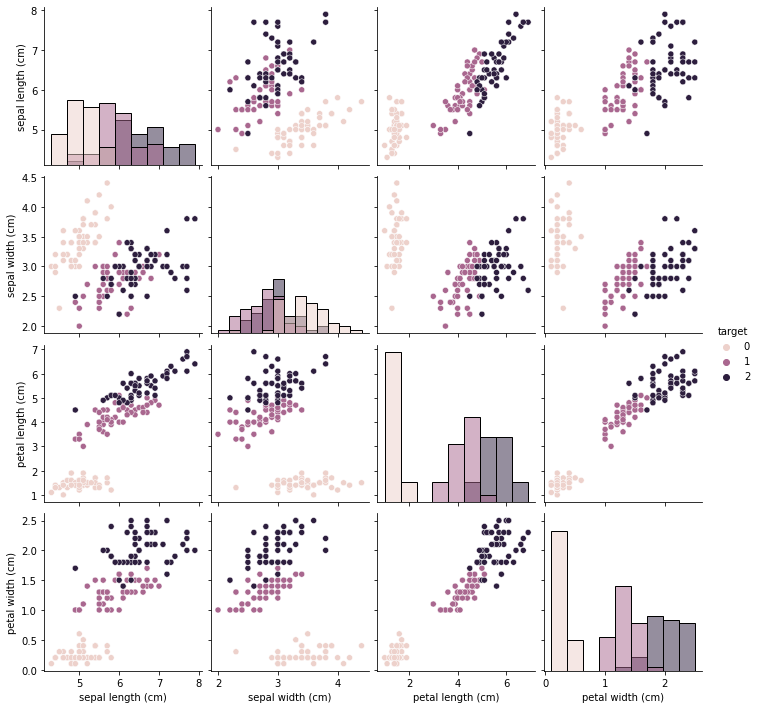

In [27]:
#特征与标签组合的散点可视化
sns.pairplot(data=iris_all,diag_kind='hist',hue='target')
plt.show()

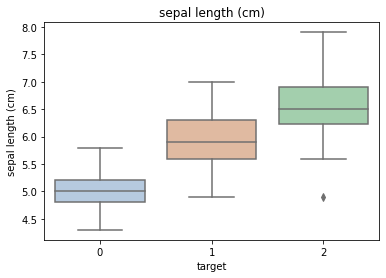

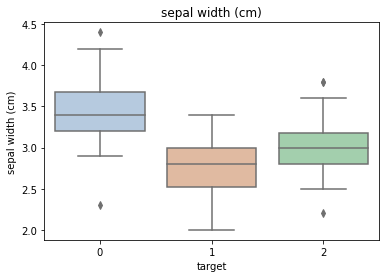

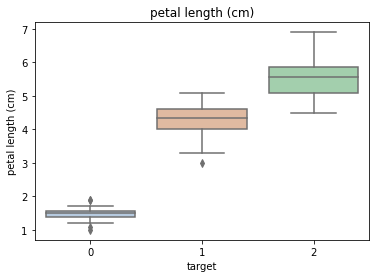

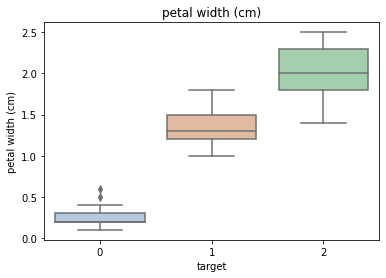

In [29]:
#绘制箱型图
for col in iris_features.columns:
    sns.boxplot(x='target',y=col,saturation=0.5,palette='pastel',data=iris_all)
    plt.title(col)
    plt.show()

No handles with labels found to put in legend.


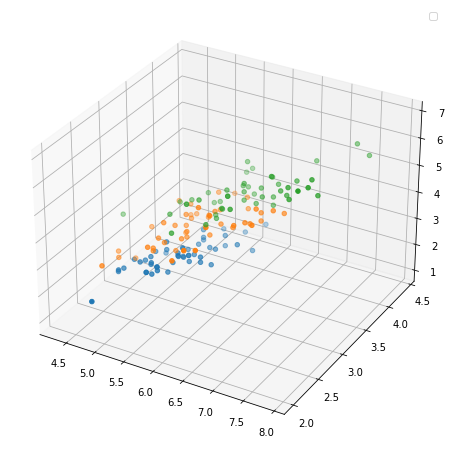

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

iris_all_class0=iris_all[iris_all['target']==0].values
iris_all_class1=iris_all[iris_all['target']==1].values
iris_all_class2=iris_all[iris_all['target']==2].values

ax.scatter(iris_all_class0[:,0],iris_all_class0[:,1],iris_all_class0[:,2])
ax.scatter(iris_all_class1[:,0],iris_all_class1[:,1],iris_all_class1[:,2])
ax.scatter(iris_all_class2[:,0],iris_all_class2[:,1],iris_all_class2[:,2])
plt.legend()
plt.show()

#### Step5:利用逻辑回归模型在二分类上进行训练和预测

In [31]:
from sklearn.model_selection import train_test_split

iris_features_part=iris_features.iloc[:100]
iris_target_part=iris_target[:100]
x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=2020)


In [32]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=0,solver='lbfgs')

In [33]:
clf.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [34]:
print('the weight of Logistic Regression:',clf.coef_)
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic Regression: [-6.53367714]


In [35]:
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)

In [38]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

#混淆矩阵：预测值和真实值的各类情况统计矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


知识点补充： <br>
混淆矩阵：每一列代表了预测类别，每一列的总数表示预测为该类别的样本数量<br>
        每一行代表了数据的真实归属类别，每一行的数据总数代表该类别的数据实例的数目

#### 准确度为1，代表所有的样本都预测正确

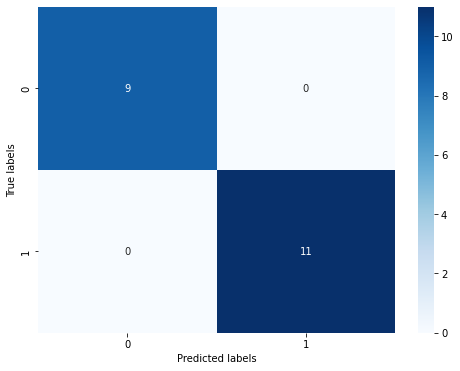

In [39]:
#绘制热力图
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Step6:利用逻辑回归模型在三分类上进行训练和预测<br>
##### PS:对于多分类而言，将多个二分类的逻辑回归组合，即可得到多分类

In [57]:
x_train,x_test,y_train,y_test=train_test_split(iris_features,iris_target,test_size=0.2,random_state=2020)

In [43]:
clf=LogisticRegression(random_state=0,solver='lbfgs')

In [44]:
clf.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [45]:
print('the weight of Logistic Regression:\n',clf.coef_)
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

the weight of Logistic Regression:
 [[-0.45928925  0.83069887 -2.26606531 -0.99743981]
 [ 0.33117319 -0.72863424 -0.06841147 -0.9871103 ]
 [ 0.12811606 -0.10206464  2.33447678  1.98455011]]
the intercept(w0) of Logistic Regression:
 [  9.4388067    3.93047364 -13.36928034]


In [46]:
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)

train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)

The test predict Probability of each class:
 [[1.03461737e-05 2.33279477e-02 9.76661706e-01]
 [9.69926591e-01 3.00732874e-02 1.21677000e-07]
 [2.09992549e-02 8.69156616e-01 1.09844129e-01]
 [3.61934872e-03 7.91979966e-01 2.04400686e-01]
 [7.90943208e-03 8.00605299e-01 1.91485269e-01]
 [7.30034956e-04 6.60508053e-01 3.38761912e-01]
 [1.68614210e-04 1.86322045e-01 8.13509341e-01]
 [1.06915331e-01 8.90815532e-01 2.26913671e-03]
 [9.46928071e-01 5.30707288e-02 1.20016059e-06]
 [9.62346385e-01 3.76532228e-02 3.91897297e-07]
 [1.19533386e-04 1.38823469e-01 8.61056998e-01]
 [8.78881880e-03 6.97207359e-01 2.94003822e-01]
 [9.73938143e-01 2.60617342e-02 1.22613839e-07]
 [1.78434056e-03 4.79518177e-01 5.18697483e-01]
 [5.56924345e-04 2.46776840e-01 7.52666235e-01]
 [9.83549842e-01 1.64500666e-02 9.13617271e-08]
 [1.65201476e-02 9.54672748e-01 2.88071040e-02]
 [8.99853722e-03 7.82707575e-01 2.08293888e-01]
 [2.98015029e-05 5.45900069e-02 9.45380192e-01]
 [9.35695863e-01 6.43039522e-02 1.85301368e

In [47]:
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The accuracy of the Logistic Regression is: 0.9833333333333333
The accuracy of the Logistic Regression is: 0.8666666666666667


In [48]:
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


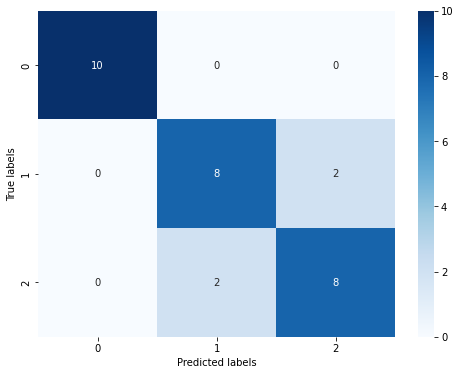

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()